<a href="https://colab.research.google.com/github/Aiswaryabinu/Titanic/blob/main/elevate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Importing necessary libraries

Seaborn(sns) : Seaborn is a Python data visualization library based on Matplotlib that provides a high-level interface for creating informative and visually appealing statistical graphics.

Scikit-learn(sklearn) : Used for data mining and data analysis, providing a wide range of supervised and unsupervised machine learning algorithms along with tools for model selection and evaluation.

Scipy(scipy) : Used for scientific and technical computing, offering modules for optimization, integration, interpolation, linear algebra, signal processing, and more.



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import zscore
import numpy as np


Read the csv file into Pandas Dataframe df

In [ ]:
df=pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The  df.info() method provides a concise summary of the DataFrame, showing the number of non-null entries and data types for each column.

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Checks the missing values in the dataframe and return the bool values as result

In [ ]:

df.isnull()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


The df.isnull().sum() command gives you a count of missing values (NaN)  in each column of the DataFrame.


In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Handling of missing values


*    missing values: Age,Cabin,embarked
*   Since, age is an integer we use mean method.


*   Cabin,Embarked - Text
*   Mode method is preferred for the above.





In [ ]:

df['Age'].fillna(df['Age'].mean())


,Age
0,22.000000
1,38.000000
2,26.000000
3,35.000000
4,35.000000
...,...
886,27.000000
887,19.000000
888,29.699118
889,26.000000


In [ ]:
df['Cabin'].fillna(df['Cabin'].mode()[0])

,Cabin
0,B96 B98
1,C85
2,B96 B98
3,C123
4,B96 B98
...,...
886,B96 B98
887,B42
888,B96 B98
889,C148


In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0])

,Embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


Encoding


*  Identified the categorical features.
*  Categorical features : Sex, Embarked.


*   Since,both are nominal data we can use LabelEncoder here.
*  Nominal data consists of categories without any inherent order or ranking. These are simple labels used to classify data.


*   Label Encoding assigns a unique integer to each category.
*   List item







In [ ]:
LabelEncoder().fit_transform(df['Sex'])

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [ ]:
LabelEncoder().fit_transform(df['Embarked'])

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 3, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1,

Normalizing of numerical features using MinMax method

In [ ]:
scaler=MinMaxScaler()
scaler.fit_transform(df[['Age','Fare','PassengerId','Pclass','SibSp','Parch']])


array([[0.27117366, 0.01415106, 0.        , 1.        , 0.125     ,
        0.        ],
       [0.4722292 , 0.13913574, 0.0011236 , 0.        , 0.125     ,
        0.        ],
       [0.32143755, 0.01546857, 0.00224719, 1.        , 0.        ,
        0.        ],
       ...,
       [       nan, 0.04577135, 0.99775281, 1.        , 0.125     ,
        0.33333333],
       [0.32143755, 0.0585561 , 0.9988764 , 0.        , 0.        ,
        0.        ],
       [0.39683338, 0.01512699, 1.        , 1.        , 0.        ,
        0.        ]])

Visualize outliers using boxplots

<Axes: ylabel='Age'>

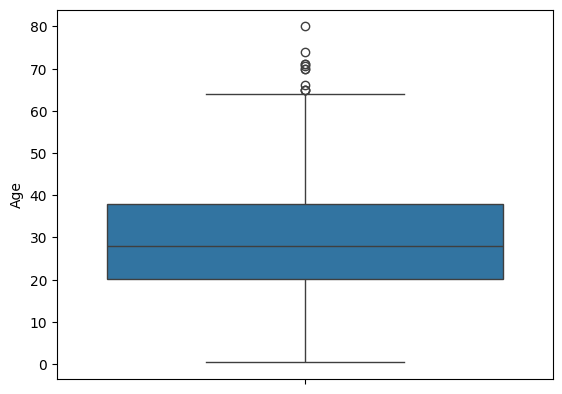

In [ ]:
sns.boxplot(df['Age'])


<Axes: ylabel='Fare'>

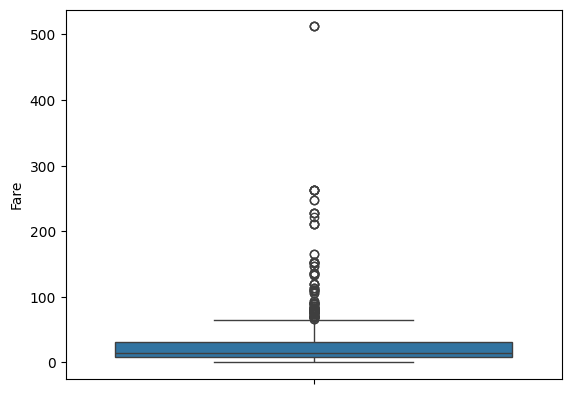

In [ ]:
sns.boxplot(df['Fare'])

<Axes: ylabel='SibSp'>

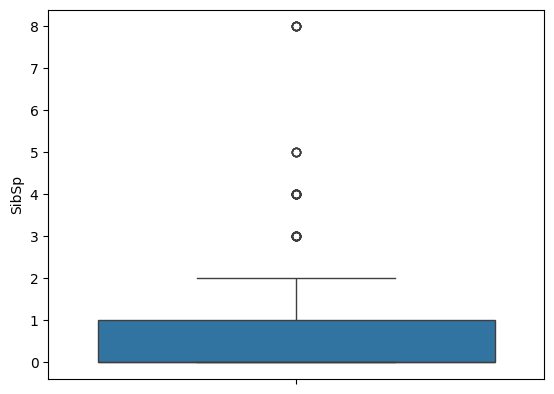

In [ ]:
sns.boxplot(df['SibSp'])

<Axes: ylabel='Parch'>

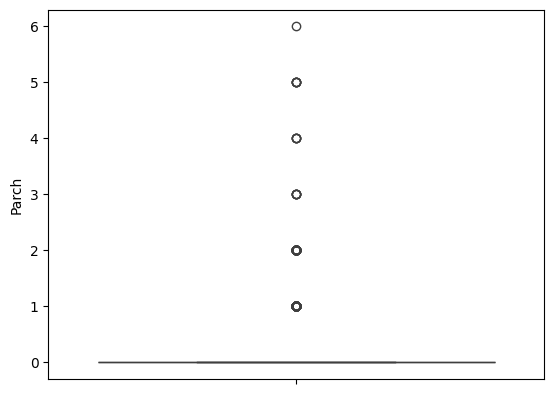

In [ ]:
sns.boxplot(df['Parch'])

Removal of outliers


*   Outliers are data points that deviate significantly from other data points in a dataset.
*   Z- Score is also called a standard score. This score measures how far a data point is from the mean, in terms of standard deviations. If the Z-score exceeds a given threshold (commonly 3) the data point is considered an outlier.



In [ ]:
numerical_cols = ['Age', 'Fare', 'SibSp', 'Parch']
z_scores = zscore(df[numerical_cols])
abs_z_scores = np.abs(zscore(df[numerical_cols]))
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]


Plot before outlier

Text(0.5, 1.0, 'Before Outlier Removal')

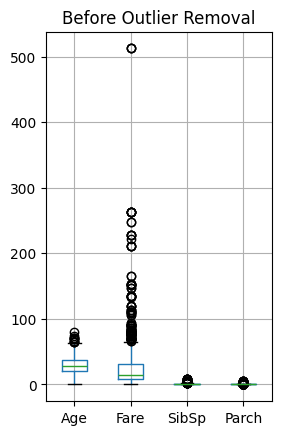

In [ ]:
plt.subplot(1, 2, 1)
df[numerical_cols].boxplot()
plt.title("Before Outlier Removal")

Plot after outlier

Text(0.5, 1.0, 'After Outlier Removal')

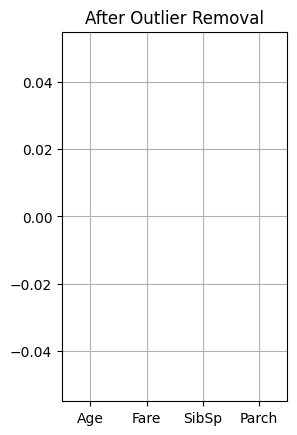

In [ ]:
plt.subplot(1, 2, 2)
new_df[numerical_cols].boxplot()
plt.title("After Outlier Removal")